In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fast = pd.read_csv("../results_remote/output_places_US_legacy_fast.csv")
ckmbr = pd.read_csv("../results_remote/output_places_US_legacy_ckqst.csv")


res = pd.concat([
    fast.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckmbr.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])
res = res[res['name'].isin(['legacy_fast', 'legacy_ckqst'])]

name_map = {
    "legacy_fast": "FAST (MBR)",
    "legacy_ckqst": "AOIQ (MBR)",
}
res['name'] = res['name'].apply(lambda x: name_map[x])

res

,creation_time,search_time,num_queries,name
0,948629439,1528903557,100000,FAST (MBR)
1,4350107449,4449141000,500000,FAST (MBR)
2,10186590706,11443391758,1000000,FAST (MBR)
3,27333935016,16948180203,2500000,FAST (MBR)
4,65676776182,34802052722,5000000,FAST (MBR)
5,955421865,1536496694,100000,FAST (MBR)
6,5352309933,4008871117,500000,FAST (MBR)
7,10613121132,13494634529,1000000,FAST (MBR)
8,25378276309,18761310088,2500000,FAST (MBR)
9,63789456266,31023531920,5000000,FAST (MBR)


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Index creation time (sec)'>

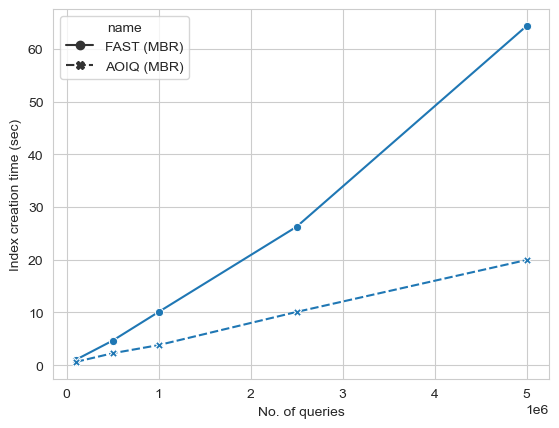

In [3]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [4]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
1,4350107449,8898.282000,500000,FAST (MBR)
6,5352309933,8017.742234,500000,FAST (MBR)
11,4211154456,9765.623174,500000,FAST (MBR)
1,2298396010,31345.766178,500000,AOIQ (MBR)
6,2391822827,29522.918774,500000,AOIQ (MBR)
11,2050938337,27878.255596,500000,AOIQ (MBR)


In [5]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
3,27333935016,16948180203,2500000,FAST (MBR)
8,25378276309,18761310088,2500000,FAST (MBR)
13,26049880272,18836622822,2500000,FAST (MBR)
3,9805818364,84322693764,2500000,AOIQ (MBR)
8,9618915026,78855015459,2500000,AOIQ (MBR)
13,10843187072,68824015239,2500000,AOIQ (MBR)


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Query Matching Time (nano sec)'>

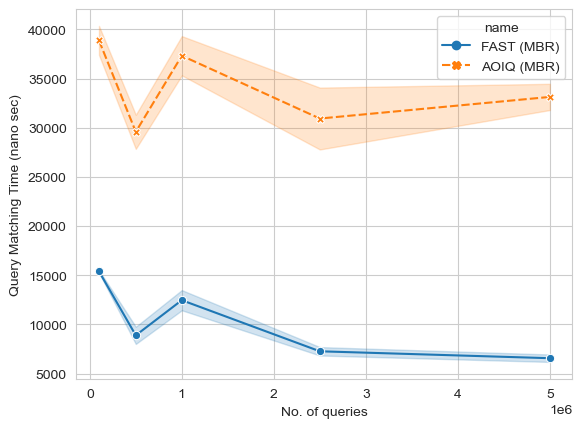

In [6]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (nano sec)'] = search_res['search_time'].apply(lambda x: x) / search_res['num_queries']
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (nano sec)', hue='name', style='name', data=search_res, errorbar="sd", markers=True)

In [7]:
# Optimization
# - Custom iterator
# - Circle bound calculation